In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./training_data.csv')

C:\Users\nagan\AppData\Local\Temp\ipykernel_15080\2869768254.py:1: DtypeWarning: Columns (6,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./training_data.csv')


In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df.head()

,PolicyNo,Policy_Company,Policy_Installment_Term,Policy_Billing_Code,Policy_Method_Of_Payment,Policy_Reinstatement_Fee_Indicator,Policy_Zip_Code_Garaging_Location,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Make_Description,Vehicle_Performance,Vehicle_New_Cost_Amount,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Usage,Vehicle_Miles_To_Work,Vehicle_Days_Per_Week_Driven,Vehicle_Annual_Miles,Vehicle_Anti_Theft_Device,Vehicle_Passive_Restraint,Vehicle_Age_In_Years,Vehicle_Med_Pay_Limit,Vehicle_Bodily_Injury_Limit,Vehicle_Physical_Damage_Limit,Vehicle_Comprehensive_Coverage_Indicator,Vehicle_Comprehensive_Coverage_Limit,Vehicle_Collision_Coverage_Indicator,Vehicle_Collision_Coverage_Deductible,Driver_Total,Driver_Total_Male,Driver_Total_Female,Driver_Total_Single,Driver_Total_Married,Driver_Total_Related_To_Insured_Self,Driver_Total_Related_To_Insured_Spouse,Driver_Total_Related_To_Insured_Child,Driver_Total_Licensed_In_State,Driver_Minimum_Age,Driver_Maximum_Age,Driver_Total_Teenager_Age_15_19,Driver_Total_College_Ages_20_23,Driver_Total_Young_Adult_Ages_24_29,Driver_Total_Low_Middle_Adult_Ages_30_39,Driver_Total_Middle_Adult_Ages_40_49,Driver_Total_Adult_Ages_50_64,Driver_Total_Senior_Ages_65_69,Driver_Total_Upper_Senior_Ages_70_plus,Vehicle_Youthful_Driver_Indicator,Vehicle_Youthful_Driver_Training_Code,Vehicle_Youthful_Good_Student_Code,Vehicle_Driver_Points,Vehicle_Safe_Driver_Discount_Indicator,EEA_Liability_Coverage_Only_Indicator,EEA_Multi_Auto_Policies_Indicator,EEA_Policy_Zip_Code_3,EEA_Policy_Tenure,EEA_Agency_Type,EEA_Packaged_Policy_Indicator,EEA_Full_Coverage_Indicator,EEA_Prior_Bodily_Injury_Limit,EEA_PolicyYear,SYS_Renewed,SYS_New_Business,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
0,164532941,Standard,6,Direct Billed to Insured,Pre-paid,N,43046,35,2004,BUIK LESABRE LI,Standard,-1,11,1,Farm,-1,5,Unknown,Not Applicable,Y,3,1000,250-500,100000,N,-1,Y,500,1,0,1,0,0,1,0,0,1,75,75,0,0,0,0,0,0,0,1,N,Not Applicable,Not Eligible for Good Student Credit,0,Y,N,N,430,22.7,Standard,N,Y,100-400,2006,Y,N,320.12,0,0.0,0.0,0.0,0.0
1,164533241,Standard,6,Direct Billed to Insured,Pre-paid,N,Unknown,35,1980,CADILLAC 4-DOOR,Standard,-1,11,1,Farm,-1,5,Unknown,Not Applicable,N,9,2000,100-300,50000,N,-1,Y,50,1,0,1,0,1,0,0,0,1,71,71,0,0,0,0,0,0,0,1,N,Not Applicable,Not Eligible for Good Student Credit,0,Y,N,N,Unknown,47.1,Preferred,N,Y,100-200,2006,Y,N,259.70,0,0.0,0.0,0.0,0.0
2,164534633,Standard,6,Direct Billed to Insured,Pre-paid,N,43555,17,2005,PONT MONTANA SV,Standard,-1,10,1,Pleasure,-1,5,Unknown,Passive Disabling-Vehicle Recovery,Y,2,50000,250-500,100000,N,-1,Y,100,1,1,0,0,1,1,0,0,1,80,80,0,0,0,0,0,0,0,1,N,Not Applicable,Not Eligible for Good Student Credit,0,Y,N,N,435,47.2,Non-standard,N,Y,100-400,2006,Y,N,613.74,0,0.0,0.0,0.0,0.0
3,164534839,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,Standard,-1,12,1,Pleasure,-1,5,Unknown,Passive Disabling-Vehicle Recovery,Y,2,5000,50-100,35000,N,-1,Y,250,1,1,0,0,1,1,0,0,1,74,74,0,0,0,0,0,0,0,1,N,Not Applicable,Not Eligible for Good Student Credit,0,Y,N,Y,435,46.7,Non-standard,Y,Y,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0
4,164534840,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,Standard,-1,12,1,Pleasure,-1,5,Unknown,Passive Disabling-Vehicle Recovery,Y,2,5000,50-100,35000,N,-1,Y,250,1,1,0,0,1,1,0,0,1,75,75,0,0,0,0,0,0,0,1,N,Not Applicable,Not Eligible for Good Student Credit,0,Y,N,Y,435,47.2,Non-standard,Y,Y,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424431 entries, 0 to 424430
Data columns (total 69 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   PolicyNo                                  424431 non-null  int64  
 1   Policy_Company                            424431 non-null  object 
 2   Policy_Installment_Term                   424431 non-null  int64  
 3   Policy_Billing_Code                       424431 non-null  object 
 4   Policy_Method_Of_Payment                  424431 non-null  object 
 5   Policy_Reinstatement_Fee_Indicator        424431 non-null  object 
 6   Policy_Zip_Code_Garaging_Location         424431 non-null  object 
 7   Vehicle_Territory                         424431 non-null  int64  
 8   Vehicle_Make_Year                         424431 non-null  int64  
 9   Vehicle_Make_Description                  424431 non-null  object 
 10  Vehicle_Performance 

In [15]:
(df['Vehicle_Passive_Restraint'] == 'Unknown').sum()

81

In [18]:
mode_value = df['Vehicle_Passive_Restraint'].mode()[0]
df['Vehicle_Passive_Restraint'].fillna(mode_value, inplace=True)

In [19]:
df['Vehicle_Passive_Restraint'].value_counts()

Y          311935
N          112415
Unknown        81
Name: Vehicle_Passive_Restraint, dtype: int64

In [6]:
# Fetching all the numeric columns to represent the histogram of the features
numeric_cols = df.select_dtypes(['int64','float64']).columns
df_numeric = df[numeric_cols]

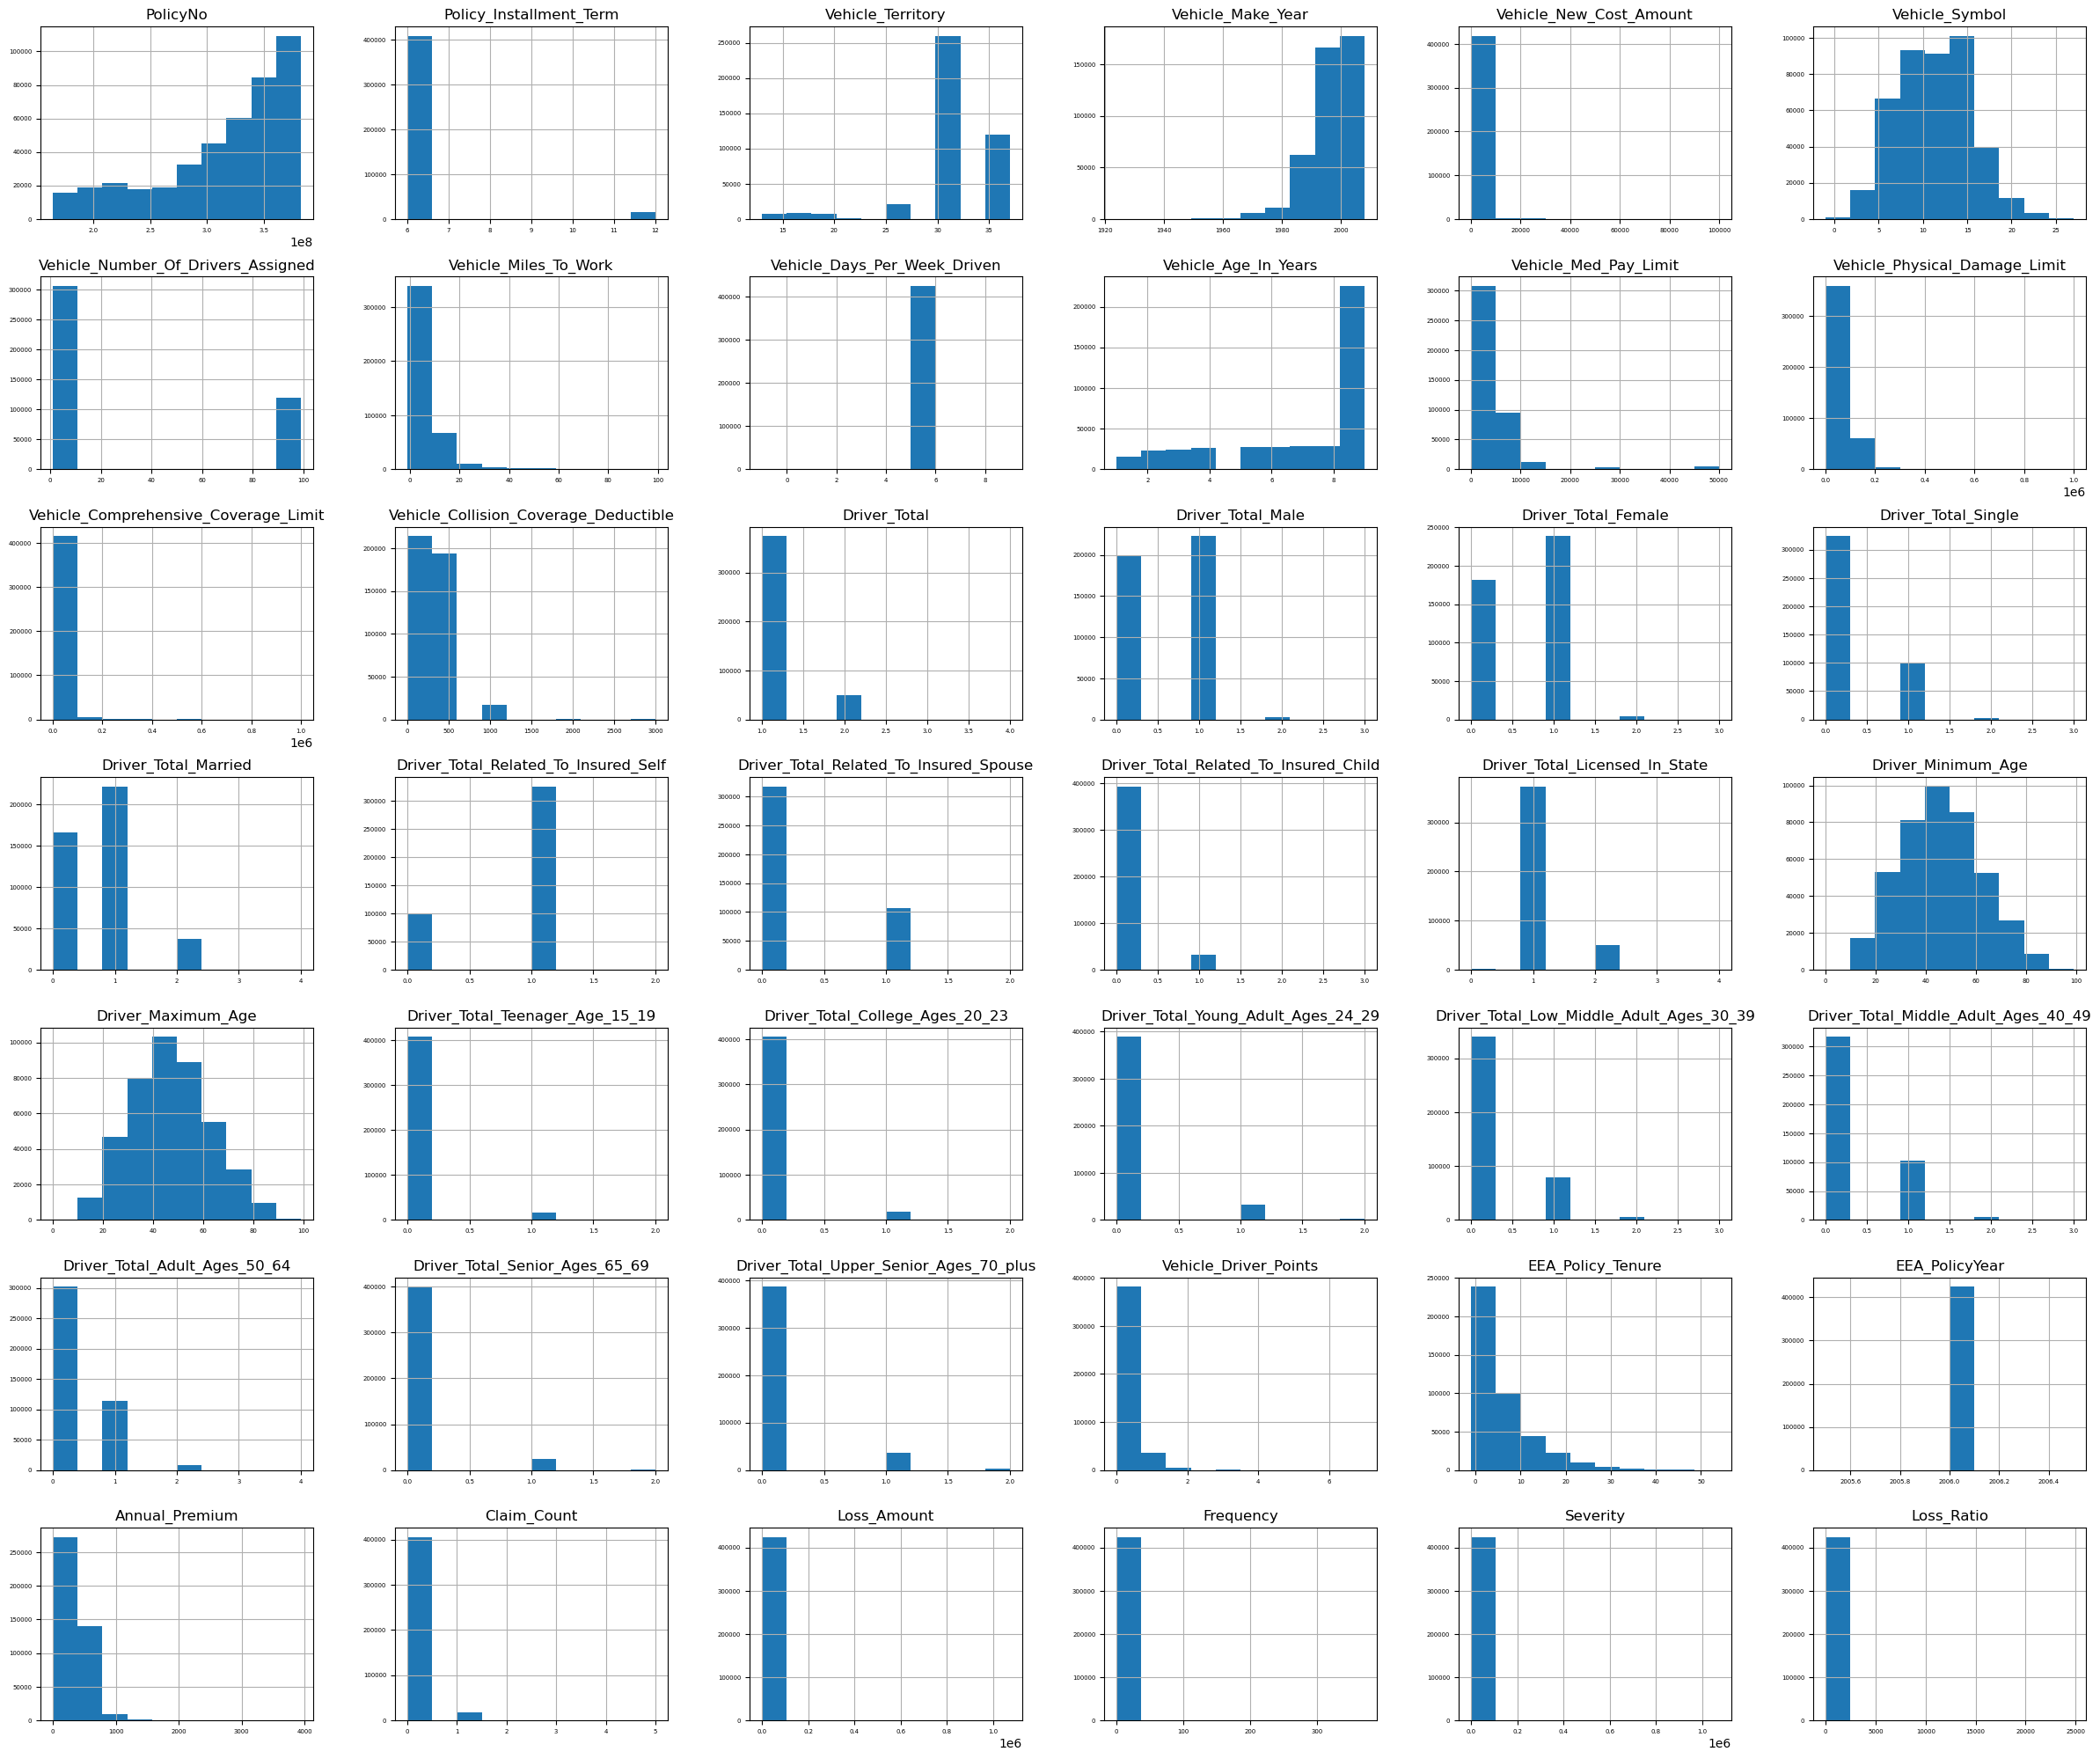

In [7]:
df_numeric.hist(figsize=(30, 25), bins=10, xlabelsize=5, ylabelsize=5);

In [8]:
#Find Missing Values
missing_counts = df.isnull().sum()
missing_columns = missing_counts > 0
missing_cols = missing_counts[missing_columns]
print(missing_cols)

Vehicle_Bodily_Injury_Limit      17326
EEA_Prior_Bodily_Injury_Limit    17326
dtype: int64


In [9]:
# We have 17K missing values we need to replace it with some value
def convert_to_numerical(value):
    if isinstance(value, str):
        if 'M' in value:
          value = value.replace('M', '000')
        lower, upper = value.split('-')
        return (int(lower), int(upper))
    else:
        return None

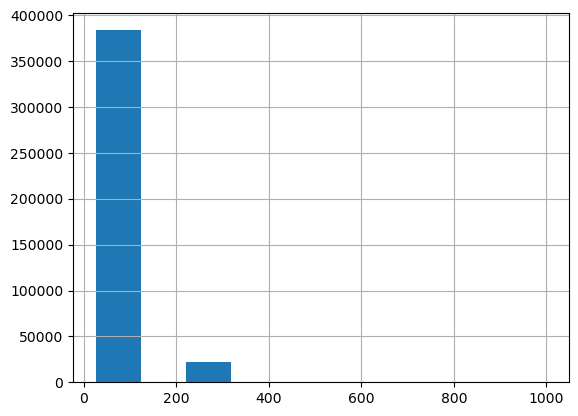

In [10]:
df['Vehicle_Bodily_Injury_Limit'] = df['Vehicle_Bodily_Injury_Limit'].apply(convert_to_numerical)
lower_limits = df['Vehicle_Bodily_Injury_Limit'].apply(lambda x: int(x[0]) if x is not None else np.nan)
lower_limits = lower_limits.dropna()
lower_limits.hist(bins=10)
plt.show()

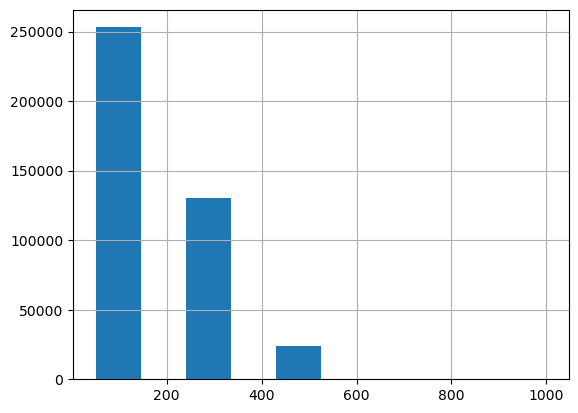

In [11]:
upper_limits = df['Vehicle_Bodily_Injury_Limit'].apply(lambda x: int(x[1]) if x is not None else np.nan)
upper_limits = upper_limits.dropna()
upper_limits.hist(bins=10)
plt.show()

In [12]:
lower_limits = df['Vehicle_Bodily_Injury_Limit'].apply(lambda x: x[0] if x is not None else np.nan)
upper_limits = df['Vehicle_Bodily_Injury_Limit'].apply(lambda x: x[1] if x is not None else np.nan)
median_lower = lower_limits.dropna().median()
median_upper = upper_limits.dropna().median()

print('Median of lower limits: ', median_lower)
print('Median of upper limits: ', median_upper)
#Because the data is skewed we are replacing the value with the median

Median of lower limits:  50.0
Median of upper limits:  100.0


In [13]:
#Created two columns one for lower and other for upper limt
df[['Vehicle_Bodily_Injury_Lower_Limit', 'Vehicle_Bodily_Injury_Upper_Limit']] = df['Vehicle_Bodily_Injury_Limit'].apply(lambda x: pd.Series([x[0], x[1]]) if x is not None else pd.Series([np.nan, np.nan]))

In [14]:
df['Vehicle_Bodily_Injury_Lower_Limit'].fillna(median_lower, inplace=True)
df['Vehicle_Bodily_Injury_Upper_Limit'].fillna(median_upper, inplace=True)
df.drop('Vehicle_Bodily_Injury_Limit', axis=1, inplace=True)

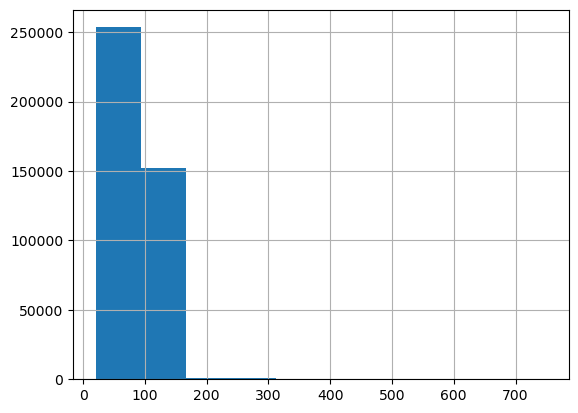

In [15]:
#Similary doing for the column EEA_Prior_Bodily_Injury_Limit
df['EEA_Prior_Bodily_Injury_Limit'] = df['EEA_Prior_Bodily_Injury_Limit'].apply(convert_to_numerical)
prior_lower_limits = df['EEA_Prior_Bodily_Injury_Limit'].apply(lambda x: int(x[0]) if x is not None else np.nan)
prior_lower_limits = prior_lower_limits.dropna()
prior_lower_limits.hist(bins=10)
plt.show()

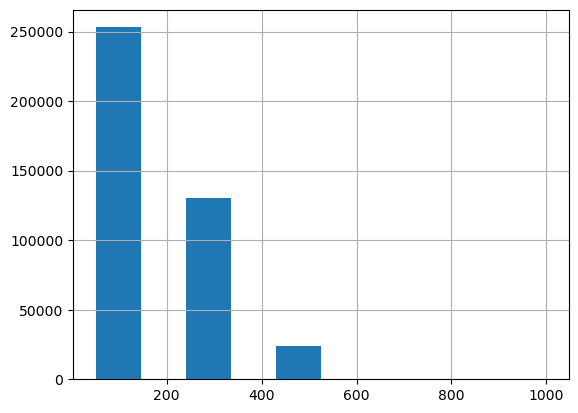

In [16]:
prior_upper_limits = df['EEA_Prior_Bodily_Injury_Limit'].apply(lambda x: int(x[1]) if x is not None else np.nan)
prior_upper_limits = prior_upper_limits.dropna()
upper_limits.hist(bins=10)
plt.show()

In [17]:
prior_lower_limits = df['EEA_Prior_Bodily_Injury_Limit'].apply(lambda x: x[0] if x is not None else np.nan)
prior_upper_limits = df['EEA_Prior_Bodily_Injury_Limit'].apply(lambda x: x[1] if x is not None else np.nan)
prior_median_lower = prior_lower_limits.dropna().median()
prior_median_upper = prior_upper_limits.dropna().median()

print('Median of lower limits: ', prior_median_lower)
print('Median of upper limits: ', prior_median_upper)

Median of lower limits:  40.0
Median of upper limits:  100.0


In [18]:
df[['EEA_Prior_Bodily_Injury_Lower_Limit', 'EEA_Prior_Bodily_Injury_Upper_Limit']] = df['EEA_Prior_Bodily_Injury_Limit'].apply(lambda x: pd.Series([x[0], x[1]]) if x is not None else pd.Series([np.nan, np.nan]))
df['EEA_Prior_Bodily_Injury_Lower_Limit'].fillna(median_lower, inplace=True)
df['EEA_Prior_Bodily_Injury_Upper_Limit'].fillna(median_upper, inplace=True)
df.drop('EEA_Prior_Bodily_Injury_Limit', axis=1, inplace=True)

In [19]:
# Moved the Loss_Ratio column to end
target_col = df.pop("Loss_Ratio")
df["Loss_Ratio"] = target_col

In [20]:
# Remove constant columns. That is columns with 0 variance.
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(df[numeric_cols])
constant_columns = [column for column in numeric_cols if column not in numeric_cols[var_thres.get_support()]]
print(constant_columns)
df.drop(constant_columns, axis=1, inplace=True)

['EEA_PolicyYear']


In [21]:
# Next we plot the correlation matrix on the independent variables and check if there are any highly correlated features
# We can remove one of the features if correlation values of 2 features is near to 1 or -1

# We are removing target/dependent value because correlation with the target value maybe very important and we shouldn't remove it
X = df.drop("Loss_Ratio", axis=1) #Feature Matrix
y = df["Loss_Ratio"] #Target

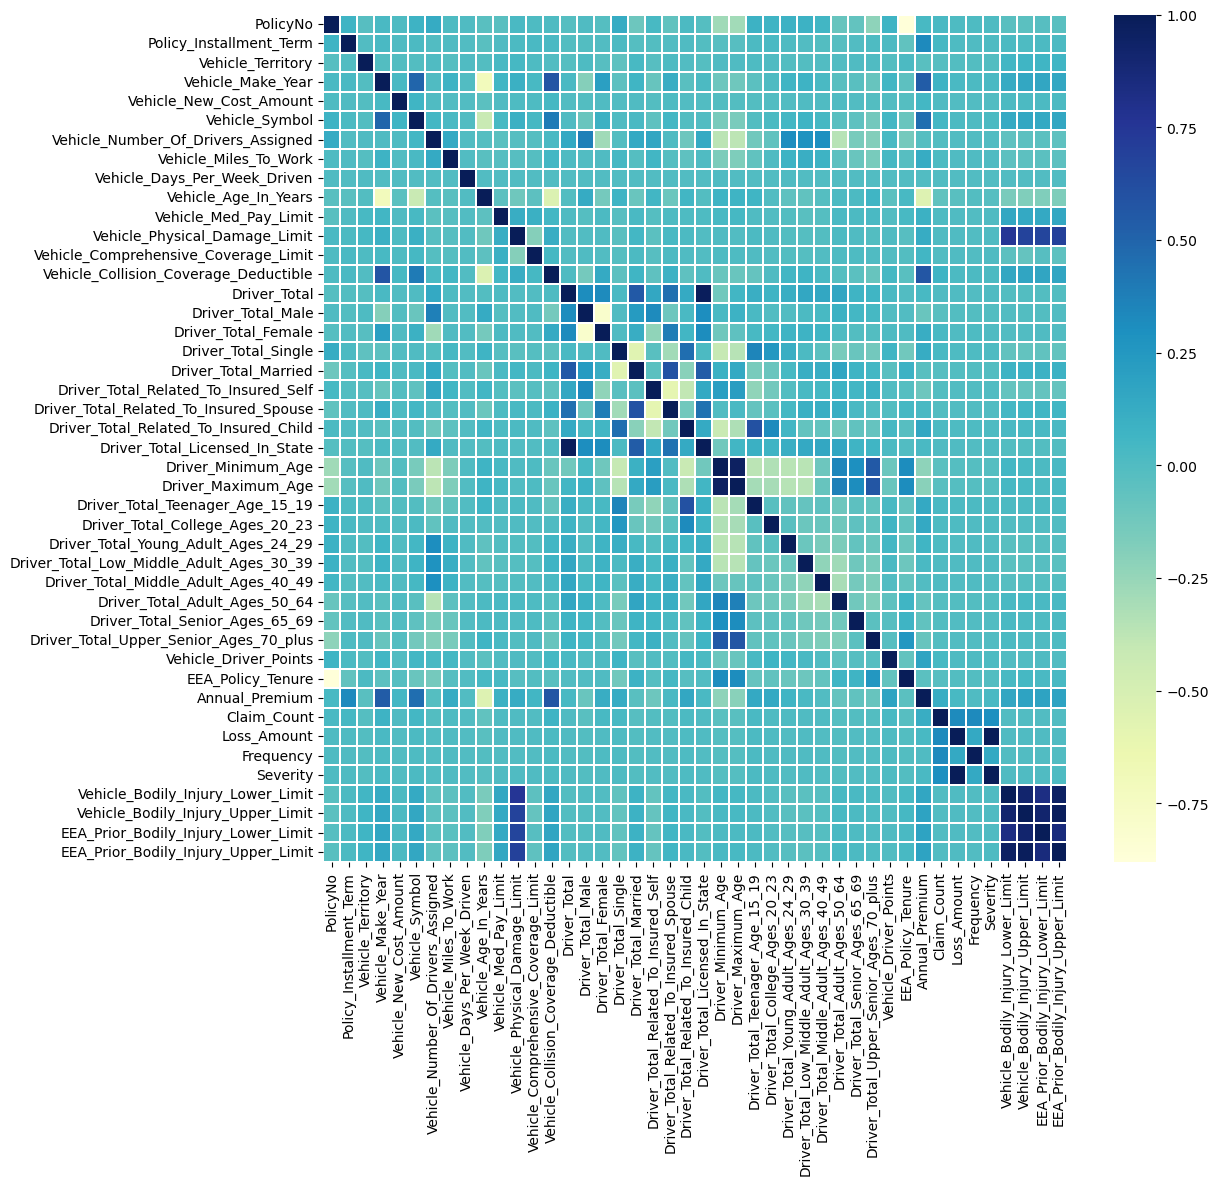

In [22]:
f, ax = plt.subplots(figsize =(12, 11)) 
X_numeric_cols = X.select_dtypes(['int64','float64']).columns
cor = X[X_numeric_cols].corr()
sns.heatmap(cor,cmap ="YlGnBu", linewidths = 0.1, ax=ax)
plt.show()

In [23]:
# Function to get columns that have correlation value greater than certain threshold
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [24]:
# These are some of the features which are highly correlated
corr_features = correlation(X[X_numeric_cols], 0.7)
corr_features

{'Driver_Maximum_Age',
 'Driver_Total_Female',
 'Driver_Total_Licensed_In_State',
 'EEA_Policy_Tenure',
 'EEA_Prior_Bodily_Injury_Lower_Limit',
 'EEA_Prior_Bodily_Injury_Upper_Limit',
 'Severity',
 'Vehicle_Age_In_Years',
 'Vehicle_Bodily_Injury_Lower_Limit',
 'Vehicle_Bodily_Injury_Upper_Limit'}

In [25]:
df['Vehicle_Performance'].value_counts()

Standard          404713
Intermediate       11381
High                5386
Sports Premium      1870
Sports              1081
Name: Vehicle_Performance, dtype: int64

In [26]:
df['Vehicle_Number_Of_Drivers_Assigned'].value_counts()

1     295837
99    118544
2       9283
3        666
4         74
5         18
6          6
8          2
7          1
Name: Vehicle_Number_Of_Drivers_Assigned, dtype: int64

In [27]:
df['Vehicle_Usage'].value_counts()

Pleasure    227389
Work        155103
Farm         39141
Business      2798
Name: Vehicle_Usage, dtype: int64

In [28]:
df['Vehicle_Passive_Restraint'].value_counts()

Y          311935
N          112415
Unknown        81
Name: Vehicle_Passive_Restraint, dtype: int64

In [29]:
# With the help of correlation, visualization graphs and our own analysis of various columns(provided in sheet). We feel 
# that below featues have the more impact on the loss ratio
selected_columns = [
    'Policy_Installment_Term',
    'Policy_Reinstatement_Fee_Indicator',
    'Vehicle_Territory',
    'Vehicle_Make_Year',
    'Vehicle_Performance',
    'Vehicle_Symbol',
    'Vehicle_Number_Of_Drivers_Assigned',
    'Vehicle_Anti_Theft_Device',
    'Vehicle_Passive_Restraint',
    'Vehicle_Age_In_Years',
    'Vehicle_Med_Pay_Limit',
    'Vehicle_Physical_Damage_Limit',
    'Vehicle_Comprehensive_Coverage_Indicator',
    'Vehicle_Collision_Coverage_Indicator',
    'Driver_Minimum_Age',
    'Driver_Maximum_Age',
    'Vehicle_Driver_Points',
    'Vehicle_Safe_Driver_Discount_Indicator',
    'Annual_Premium',
    'Loss_Amount'
]
df = df[selected_columns]

In [30]:
df.head()

,Policy_Installment_Term,Policy_Reinstatement_Fee_Indicator,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Performance,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Anti_Theft_Device,Vehicle_Passive_Restraint,Vehicle_Age_In_Years,Vehicle_Med_Pay_Limit,Vehicle_Physical_Damage_Limit,Vehicle_Comprehensive_Coverage_Indicator,Vehicle_Collision_Coverage_Indicator,Driver_Minimum_Age,Driver_Maximum_Age,Vehicle_Driver_Points,Vehicle_Safe_Driver_Discount_Indicator,Annual_Premium,Loss_Amount
0,6,N,35,2004,Standard,11,1,Not Applicable,Y,3,1000,100000,N,Y,75,75,0,Y,320.12,0.0
1,6,N,35,1980,Standard,11,1,Not Applicable,N,9,2000,50000,N,Y,71,71,0,Y,259.70,0.0
2,6,N,17,2005,Standard,10,1,Passive Disabling-Vehicle Recovery,Y,2,50000,100000,N,Y,80,80,0,Y,613.74,0.0
3,6,N,17,2005,Standard,12,1,Passive Disabling-Vehicle Recovery,Y,2,5000,35000,N,Y,74,74,0,Y,541.66,0.0
4,6,N,17,2005,Standard,12,1,Passive Disabling-Vehicle Recovery,Y,2,5000,35000,N,Y,75,75,0,Y,541.66,0.0


In [31]:
df['Vehicle_Symbol'].replace(-1, np.NaN, inplace=True)
df['Vehicle_Med_Pay_Limit'].replace(-1,np.NaN,inplace=True)
df['Vehicle_Physical_Damage_Limit'].replace(-1,np.NaN,inplace=True)
df['Vehicle_Anti_Theft_Device'].replace('Unknown', np.NaN, inplace=True)
df['Vehicle_Passive_Restraint'].replace('Unknown', np.NaN, inplace=True)

In [32]:
df.dropna(subset=['Vehicle_Symbol'], inplace=True)

In [33]:
df['Vehicle_Med_Pay_Limit'].fillna(df['Vehicle_Med_Pay_Limit'].median(), inplace=True)

In [34]:
df.dropna(subset=['Vehicle_Physical_Damage_Limit', 'Vehicle_Anti_Theft_Device', 'Vehicle_Passive_Restraint'], inplace=True)

In [35]:
# save to csv file
df.to_csv("training_dataset_cleaned.csv", index=False)